Original Data (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Data with Randomly Missing Values (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.

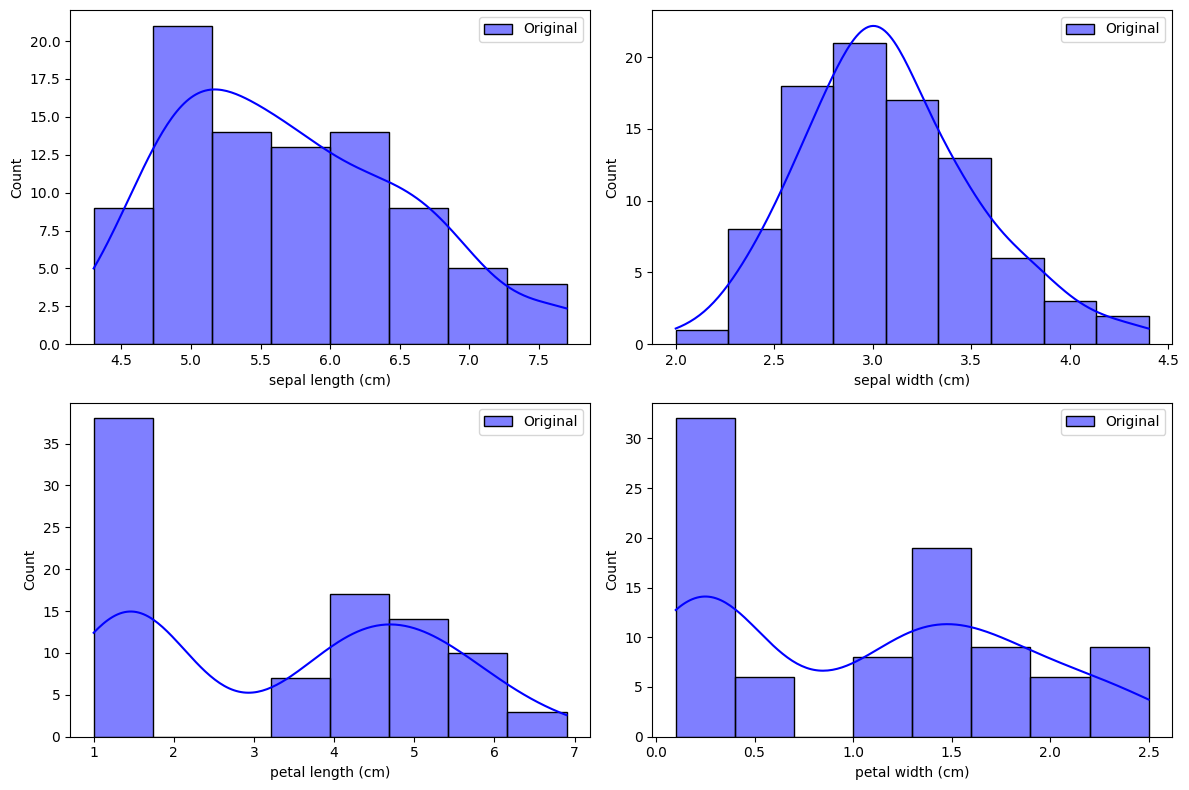

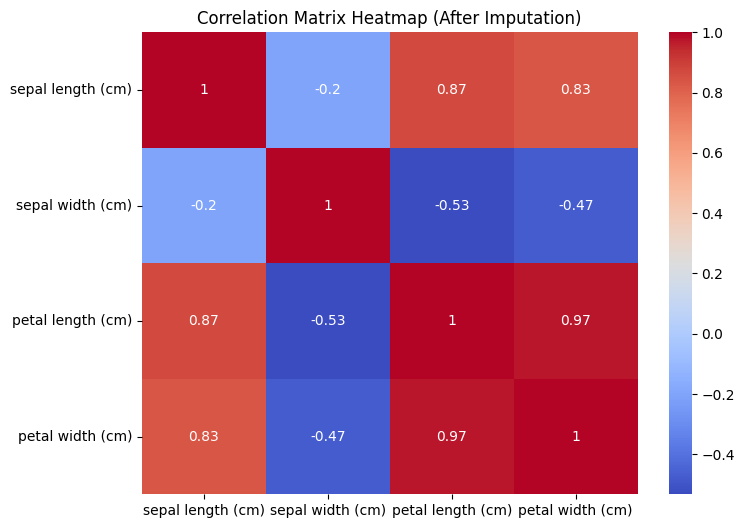

In [ ]:
#ds 1.3
# Pre-processing and Visualization of Data

from sklearn.impute import KNNImputer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = load_iris()

# Create DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Original Data (first 5 rows):")
print(df.head())

# Introduce missing values randomly
np.random.seed(41)
missing_rate = 0.1
n_missing = int(np.floor(missing_rate * df.size))
missing_indices = np.random.choice(df.size, n_missing, replace=False)

# Set random entries to NaN
df.iloc[np.unravel_index(missing_indices, df.shape)] = np.nan

print("\nData with Randomly Missing Values (first 5 rows):")
print(df.head())

# Impute missing values using KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

print("\nImputed Data (first 5 rows):")
print(df_imputed.head())

# Summary statistics
print("\nSummary Statistics of Original Data:")
print(df.describe())

# Visualization - Histogram for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, color='blue', label='Original')
    plt.legend()

plt.tight_layout()
plt.show()

# Correlation heatmap
corr_matrix = df_imputed.drop(columns=['target']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap (After Imputation)")
plt.show()

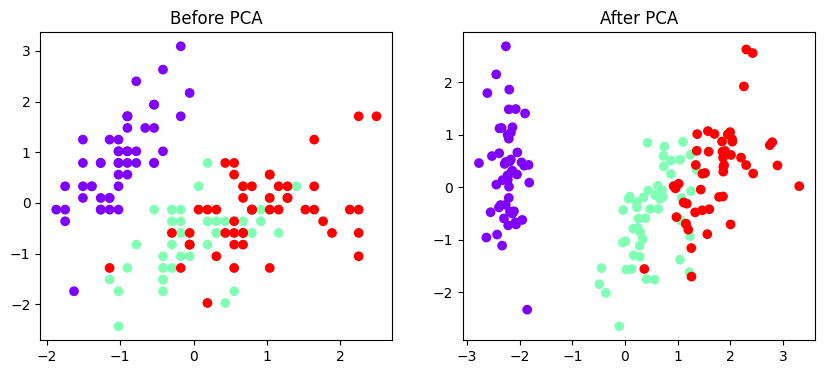

In [ ]:
#ds task2(PCA)
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = load_iris()
X = data.data
y = data.target

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='rainbow')
plt.title("Before PCA")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow')
plt.title("After PCA")

plt.show()

Selected Features:
✅ petal length (cm)
✅ petal width (cm)


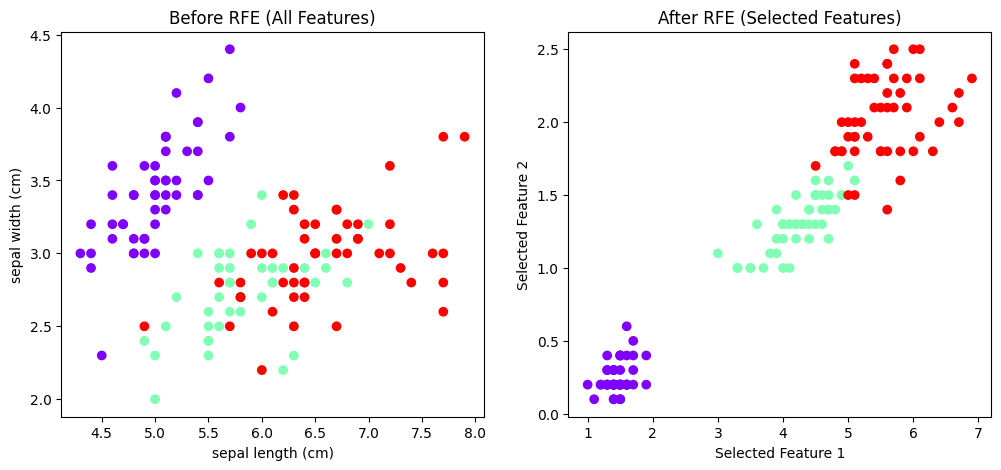

In [ ]:
#ds task2(RFE)
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

model = LogisticRegression(max_iter=200)

rfe = RFE(model, n_features_to_select=2)
X_rfe = rfe.fit_transform(X, y)

print("Selected Features:")
for name, selected in zip(feature_names, rfe.support_):
    if selected:
        print("✅", name)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
plt.title("Before RFE (All Features)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.subplot(1, 2, 2)
plt.scatter(X_rfe[:, 0], X_rfe[:, 1], c=y, cmap='rainbow')
plt.title("After RFE (Selected Features)")
plt.xlabel("Selected Feature 1")
plt.ylabel("Selected Feature 2")

plt.show()


Cleaned Columns: ['wrinkle_score', 'eye_sag', 'jawline_ratio', 'age']
First 5 rows after cleaning:
    wrinkle_score    eye_sag  jawline_ratio   age
0    9157.106637  78.955703      49.943677  43.6
1   10239.017500 -18.076840      68.799964  72.1
2    1468.836798  19.568820      24.184230  58.4
3     996.002561  37.422264      16.817769  61.8
4    1101.856569  34.275795      24.045240  66.3 


Model Performance:
MSE  : 31709773.6529
RMSE : 5631.1432
R²   : -0.6194


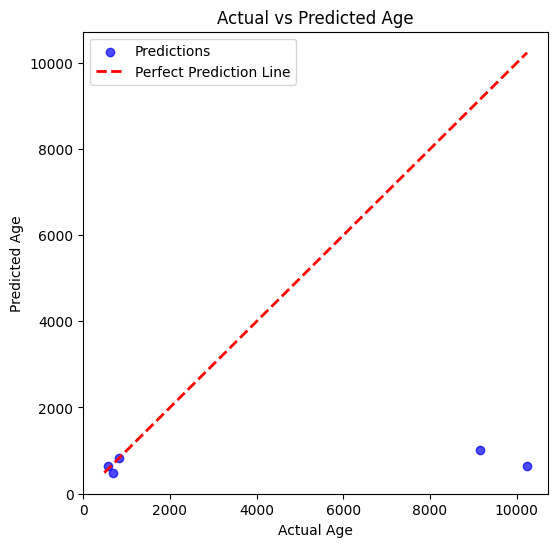

In [ ]:
#ds task-4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load dataset
FILE_PATH = "/content/facial_features_age_final.csv"
df = pd.read_csv(FILE_PATH)

# 2. Drop unnamed columns
df = df.drop(columns=df.columns[df.columns.str.contains('^Unnamed')])

# 3. Drop or fill rows with NaNs (drop is simplest here)
df = df.dropna()

print("Cleaned Columns:", df.columns.tolist())
print("First 5 rows after cleaning:\n", df.head(), "\n")

# 4. Features & target
X = df[['age', 'eye_sag', 'jawline_ratio']]  # include jawline_ratio if useful
y = df['wrinkle_score']

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Predictions
y_pred = model.predict(X_test)

# 8. Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# 9. Visualization
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue", label="Predictions")
mn, mx = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([mn, mx], [mn, mx], 'r--', lw=2, label="Perfect Prediction Line")
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age")
plt.legend()
plt.show()

In [ ]:
#ds task-5

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# 1. Load and prepare data
# -----------------------------
iris = load_iris()
X, y = iris.data[:, :2], iris.target  # first two features for visualization

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------
# 2. Euclidean KNN implementation
# -----------------------------
def euclidean_knn_predict(X_train, y_train, X_test, k=5):
    # Compute pairwise distances
    dists = np.sqrt(((X_test[:, None, :] - X_train[None, :, :]) ** 2).sum(axis=2))
    idx = np.argsort(dists, axis=1)[:, :k]  # smaller distances
    y_pred = np.array([mode(y_train[i], keepdims=False).mode for i in idx])
    return y_pred
y_pred = euclidean_knn_predict(X_train, y_train, X_test, k=5)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 0.7778

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.64      0.54      0.58        13
   virginica       0.60      0.69      0.64        13

    accuracy                           0.78        45
   macro avg       0.75      0.74      0.74        45
weighted avg       0.78      0.78      0.78        45




✅ Finalized Optimal k value (from Elbow Method): 3


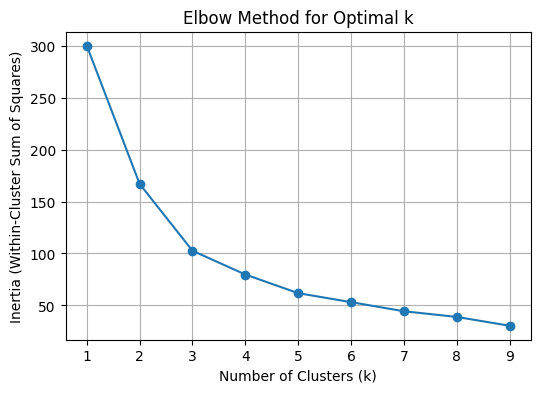

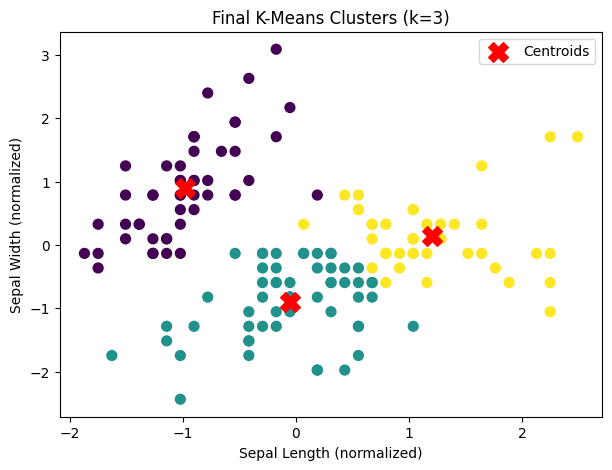

In [ ]:
#ds task-7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# -----------------------------
# 1. Load and prepare data
# -----------------------------
iris = load_iris()
X = iris.data[:, :2]  # take first two features for easy 2D visualization

scaler = StandardScaler()
X = scaler.fit_transform(X)

# -----------------------------
# 2. Elbow Method (to find optimal K)
# -----------------------------
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)  # sum of squared distances to nearest cluster center

x1, y1 = 1, inertias[0]
x2, y2 = max(K), inertias[-1]

# distances of all points from line
distances = []
for i in range(len(K)):
    x0, y0 = K[i], inertias[i]
    num = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2*y1 - y2*x1)
    den = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    distances.append(num / den)

k_final = K[np.argmax(distances)]
print(f"\n✅ Finalized Optimal k value (from Elbow Method): {k_final}")

plt.figure(figsize=(6, 4))
plt.plot(K, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

# -----------------------------
# 3. K-Means Clustering (k=3)
# -----------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Plot final clusters
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("Final K-Means Clusters (k=3)")
plt.xlabel("Sepal Length (normalized)")
plt.ylabel("Sepal Width (normalized)")
plt.legend()
plt.show()